In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import pandas as pd

In [4]:
df_ori: dict[str, pd.DataFrame] = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\ori_dec_acc_traj_s.pkl')
df_clb: dict[str, pd.DataFrame] = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_traj_s.pkl')
df_param: pd.DataFrame = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_param_df.pkl')

In [6]:
from trasim_simplified.util.hysteresis.intensity import cal_sv_intensity
from trasim_simplified.core.constant import TrackInfo as TI, Prefix, CFM
from trasim_simplified.core.kinematics.cfm import get_cf_default_param, get_cf_equilibrium

ids = list(df_ori["dec"].keys())
sv_intensity = {}
ori_sv_intensity = {}
cf_name = CFM.IDM

cf_e = get_cf_equilibrium(cf_name)

for id_ in ids:
    cf_param = {name: df_param[df_param[TI.Pair_ID] == id_][name].iloc[0] for name in get_cf_default_param(cf_name).keys()}
    l_length = df_clb["dec"][id_][Prefix.leader + TI.v_Length].iloc[0]
    sv_intensity[id_] = cal_sv_intensity(
        df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x] - l_length, df_clb["dec"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x] - l_length, df_clb["acc"][id_][TI.v],
        cf_e, cf_param)
    ori_sv_intensity[id_] = cal_sv_intensity(
        df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x] - l_length, df_ori["dec"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x] - l_length, df_ori["acc"][id_][TI.v],
        cf_e, cf_param)

sv_intensity

{0: {'dec_vs': 5.305561054253426,
  'acc_vs': 10.926803618467337,
  'total_vs': 16.232364672720763,
  'dec_ts': -1.2445935520489806,
  'acc_ts': 11.653619296821857,
  'total_ts': 5.267713931930522,
  'dec_avg_acc': 0.5292428005920455,
  'acc_avg_acc': 0.8400679374476913,
  'dec_avg_speed': 6.818726669231516,
  'acc_avg_speed': 8.914235603389717,
  'min_speed': 2.9737294064520143,
  'max_speed': 13.558585418292925,
  'dv': 10.58485601184091,
  'dec_step': 200,
  'acc_step': 126},
 1: {'dec_vs': -0.47447249602497943,
  'acc_vs': -0.18041435815619775,
  'total_vs': -0.6548868541811772,
  'dec_ts': 0.12567655802829586,
  'acc_ts': -0.043202302181886566,
  'total_ts': -0.09748535784806868,
  'dec_avg_acc': 0.562867759638858,
  'acc_avg_acc': 1.0838198350492905,
  'dec_avg_speed': 6.675773791467012,
  'acc_avg_speed': 7.05892828786601,
  'min_speed': 2.089242131481434,
  'max_speed': 12.277148580944765,
  'dv': 10.18790644946333,
  'dec_step': 181,
  'acc_step': 94},
 2: {'dec_vs': -0.370031

In [4]:
column_names = sv_intensity[list(sv_intensity.keys())[0]].keys()
df_intensity = pd.DataFrame([list(v.values()) for v in sv_intensity.values()], columns=column_names)
df_intensity[TI.Pair_ID] = sv_intensity.keys()

df_ori_intensity = pd.DataFrame([v.values() for v in ori_sv_intensity.values()], columns=["ori_" + name for name in column_names])
df_ori_intensity[TI.Pair_ID] = ori_sv_intensity.keys()

df_param_merge: pd.DataFrame = df_param.merge(df_intensity, on=TI.Pair_ID)
df_param_merge: pd.DataFrame = df_param_merge.merge(df_ori_intensity, on=TI.Pair_ID)
df_param_merge

,s0,s1,v0,T,omega,d,delta,Pair_ID,ObjV,dec_vs,...,ori_total_ts,ori_dec_avg_acc,ori_acc_avg_acc,ori_dec_avg_speed,ori_acc_avg_speed,ori_min_speed,ori_max_speed,ori_dv,ori_dec_step,ori_acc_step
0,2.721968,-0.0,40.223259,1.935539,1.207851,7.672031,3.0,0,63.559033,5.305561,...,7.352020,0.613572,1.214749,6.670747,7.736697,1.532571e+00,13.558585,12.026015,196,99
1,2.469139,0.0,22.209832,1.048622,9.995506,5.327265,3.0,1,14.565089,-0.474472,...,-0.329252,0.586215,0.975248,6.671858,7.942776,1.549418e+00,12.277149,10.727731,183,110
2,5.319366,0.0,21.852206,0.744762,10.000000,1.186306,4.0,2,39.784665,-0.370032,...,-0.630023,0.511773,0.813353,6.163349,7.106439,1.558294e+00,10.667847,9.109553,178,112
3,0.000010,0.0,16.128898,1.979694,1.766205,3.125980,3.0,3,68.409334,4.301041,...,1.844770,0.599716,0.833752,5.738378,7.110131,1.530022e+00,11.785167,10.255145,171,123
4,2.791862,-0.0,42.237055,0.795507,4.016141,10.000000,1.0,4,25.099296,0.516129,...,0.100809,0.789064,0.289160,4.780465,4.107651,1.838766e-03,9.312796,9.310957,118,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,1.592674,-0.0,23.573524,1.393871,2.331309,1.969307,3.0,639,14.176961,-3.331308,...,-0.838872,0.756700,0.635628,3.045036,5.154110,1.360412e-03,9.535779,9.534418,126,150
640,0.100231,0.0,24.008672,2.041454,1.973792,10.000000,2.0,640,32.962461,0.356737,...,1.455659,0.454954,0.427316,4.780745,5.008039,2.460510e-05,9.144591,9.144566,201,214
641,1.295023,-0.0,50.000000,0.487175,1.846598,1.873591,8.0,641,16.429270,0.230693,...,0.041163,0.426073,0.509531,5.144155,4.767966,2.200811e-06,9.884894,9.884892,232,194
642,2.806187,-0.0,18.838055,1.370878,2.840133,8.540486,2.0,642,19.417066,0.373866,...,0.896763,0.480512,0.457827,5.146290,5.532719,3.234391e-08,10.667365,10.667365,222,233


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(df_param_merge[[*list(get_cf_default_param(cf_name).keys())]], df_param_merge["total_vs"])
print(get_cf_default_param(cf_name).keys())
pca.explained_variance_ratio_

dict_keys(['v0', 's0', 's1', 'delta', 'T', 'omega', 'd'])


array([8.20674693e-01, 8.08821021e-02, 5.15618776e-02, 2.71231632e-02,
       1.82026110e-02, 1.55555266e-03, 7.70284317e-36])

# 处理后轨迹数据描述性统计

In [7]:
df_param_merge.describe()

,s0,s1,v0,T,omega,d,delta,v_ID,ObjV,dec_vs,...,ori_dec_vs,ori_acc_vs,ori_total_vs,ori_dec_ts,ori_acc_ts,ori_total_ts,ori_min_speed,ori_max_speed,ori_dec_step,ori_acc_step
count,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,130.000000,130.000000,133.000000,129.000000,130.000000,129.000000,1.330000e+02,133.000000,133.000000,133.00000
mean,3.489056,0.0,27.427784,1.124234,2.574095,4.823534,4.473684,1719.969925,37.900918,-3.578830,...,-2.636408,8.546033,6.128894,3.604645,7.490332,1.821745,6.404954e-01,12.104931,196.187970,202.18797
std,2.095626,0.0,12.944415,0.586697,2.336219,3.911855,3.530342,781.017915,22.462243,2.093461,...,2.426775,3.797292,5.359959,2.061985,3.790630,2.463742,7.575382e-01,1.862450,61.828349,83.59989
min,0.000000,0.0,10.693357,0.000000,0.399849,0.100000,1.000000,280.000000,4.447199,-9.546808,...,-9.762688,1.873998,-5.474801,-3.243582,2.106575,-3.909802,1.856687e-15,4.933887,49.000000,38.00000
25%,2.188234,0.0,16.324819,0.698166,1.371234,1.095659,2.000000,1077.000000,21.655847,-4.585860,...,-4.041671,6.217717,2.625305,2.493631,4.965912,0.449259,5.479691e-06,10.713431,161.000000,129.00000
50%,3.311157,0.0,23.357901,1.024160,1.804697,3.744626,3.000000,1712.000000,33.335710,-3.590834,...,-2.638568,8.030276,5.572123,3.597950,6.502620,1.499586,1.348611e-02,12.191970,206.000000,185.00000
75%,4.725275,0.0,35.475179,1.575346,2.557373,9.999613,9.000000,2594.000000,49.210656,-2.324525,...,-1.365934,10.245791,8.961212,4.803350,9.165038,2.886724,1.524002e+00,13.442293,231.000000,268.00000
max,10.000000,0.0,50.000000,2.848654,10.000000,10.000000,10.000000,2783.000000,142.241824,3.388382,...,3.464317,22.360357,25.403432,9.212414,24.307892,14.350728,2.513798e+00,16.827079,388.000000,433.00000


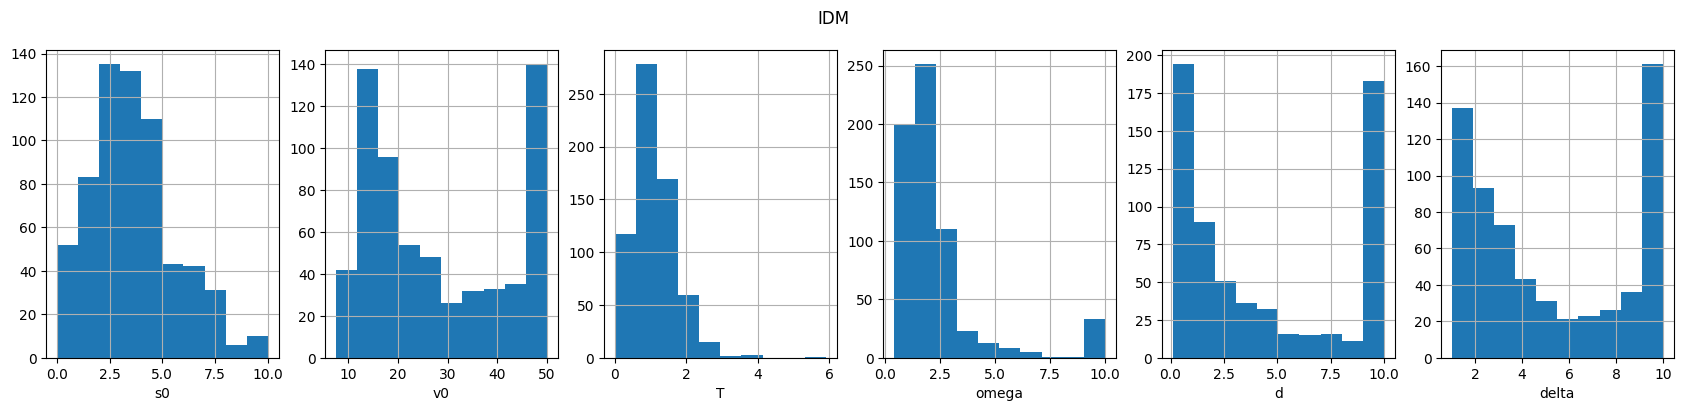

In [33]:
fig, axes = plt.subplots(1, 6, figsize=(21, 4))
fig.suptitle("IDM")
for i, name in enumerate(["s0", "v0", "T", "omega", "d", "delta"]):
    axes[i].set_xlabel(name)
    axes[i].hist(df_param_merge[name])
    axes[i].grid()
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\IDM_param_hist.png")

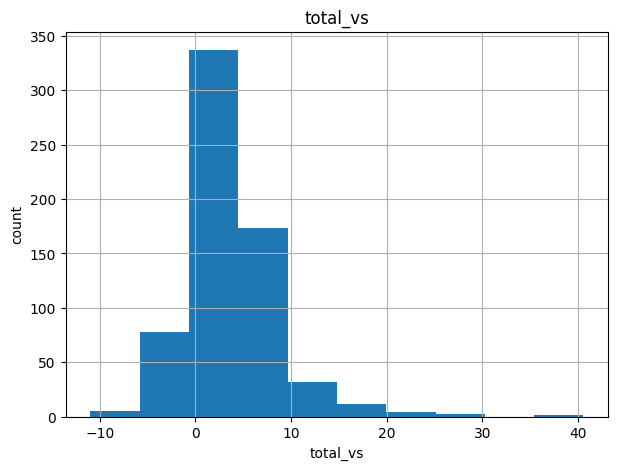

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

df_param_merge[["total_vs"]].hist(ax=ax)

ax.set_xlabel("total_vs")
ax.set_ylabel("count")

fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\ori_full_vs_hist.png")

In [32]:
len(df_param_merge[df_param_merge["total_vs"] > 0]) / len(df_param_merge)

0.8198757763975155

In [12]:
dec_result_df = pd.DataFrame(columns=["id", "dec_min_speed", "dec_speed_range", "dec_step", "dec_mean_dhw"])
for v_id in ids:
    temp = df_ori["dec"][v_id]
    dec_result_df = dec_result_df._append({
        "id": v_id,
        "dec_min_speed": temp[TI.v].min(),
        "dec_speed_range": temp[TI.v].max() - temp[TI.v].min(),
        "dec_step": len(temp[TI.v]),
        "dec_mean_dhw": (temp[Prefix.leader + TI.x] - temp[TI.x]).mean()
    }, ignore_index=True)
acc_result_df = pd.DataFrame(columns=["id", "acc_min_speed", "acc_speed_range", "acc_step", "acc_mean_dhw"])
for v_id in ids:
    temp = df_ori["acc"][v_id]
    acc_result_df = acc_result_df._append({
        "id": v_id,
        "acc_min_speed": temp[TI.v].min(),
        "acc_speed_range": temp[TI.v].max() - temp[TI.v].min(),
        "acc_step": len(temp[TI.v]),
        "acc_mean_dhw": (temp[Prefix.leader + TI.x] - temp[TI.x]).mean()
    }, ignore_index=True)
full_result_df = dec_result_df.merge(acc_result_df, on="id")
full_result_df["full_min_speed"] = full_result_df[["dec_min_speed", "acc_min_speed"]].min(axis=1)
full_result_df["full_speed_range"] = full_result_df[["dec_speed_range", "acc_speed_range"]].max(axis=1)
full_result_df["full_step"] = full_result_df["dec_step"] + full_result_df["acc_step"]
full_result_df["full_mean_dhw"] = full_result_df["dec_mean_dhw"] * full_result_df["dec_step"] / full_result_df["full_step"] + full_result_df["acc_mean_dhw"] * full_result_df["acc_step"] / full_result_df["full_step"]
full_result_df.describe()

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_17768\4239976199.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dec_result_df = dec_result_df._append({
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_17768\4239976199.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc_result_df = acc_result_df._append({


,id,dec_min_speed,dec_speed_range,dec_step,dec_mean_dhw,acc_min_speed,acc_speed_range,acc_step,acc_mean_dhw,full_min_speed,full_speed_range,full_step,full_mean_dhw
count,133.000000,1.330000e+02,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000
mean,1719.969925,6.404954e-01,12.375665,232.060150,16.960504,5.915841e-01,15.648074,302.195489,24.011632,5.222082e-01,16.148852,534.255639,21.052948
std,781.017915,7.575382e-01,1.585095,65.141194,5.795184,7.426414e-01,3.757594,98.183923,9.802690,6.884711e-01,3.100236,126.312842,7.308143
min,280.000000,1.856687e-15,5.109336,100.000000,7.709854,1.752453e-17,7.055961,96.000000,9.155081,1.752453e-17,9.697470,218.000000,9.090511
25%,1077.000000,5.479691e-06,11.317306,194.000000,12.703990,3.150142e-06,12.338485,225.000000,16.433430,2.141859e-06,13.378912,447.000000,15.516508
50%,1712.000000,1.348611e-02,12.217634,231.000000,15.626244,1.708717e-02,16.460599,323.000000,21.401285,9.109974e-03,16.460599,565.000000,19.274254
75%,2594.000000,1.524002e+00,13.495325,264.000000,19.656501,1.520538e+00,18.710625,378.000000,29.797543,1.498745e+00,18.710625,615.000000,25.055804
max,2783.000000,2.513798e+00,16.828415,424.000000,38.486937,3.047999e+00,22.971782,510.000000,54.659148,1.954676e+00,22.971782,791.000000,43.854521


In [14]:
full_result_df[full_result_df["acc_step"] < 100]

,id,dec_min_speed,dec_speed_range,dec_step,dec_mean_dhw,acc_min_speed,acc_speed_range,acc_step,acc_mean_dhw,full_min_speed,full_speed_range,full_step,full_mean_dhw
96,2487.0,1.491442,12.689206,145.0,15.447575,0.094548,7.055961,96.0,11.604933,0.094548,12.689206,241.0,13.916896


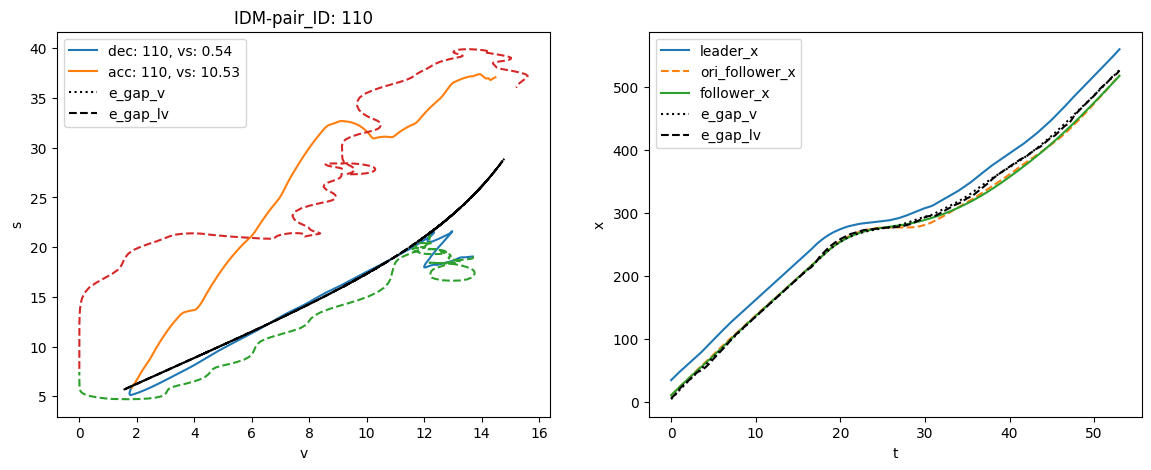

In [7]:
import random
import numpy as np
from trasim_simplified.core.kinematics.cfm.CFModel_IDM import cf_IDM_equilibrium

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig: plt.Figure = fig
axes: list[plt.Axes] = axes

id_ = random.choice(ids)
id_ = 110

full_v = np.concatenate([df_clb["dec"][id_][TI.v], df_clb["acc"][id_][TI.v]])
full_lv = np.concatenate([df_clb["dec"][id_][Prefix.leader + TI.v], df_clb["acc"][id_][Prefix.leader + TI.v]])
full_lx = np.concatenate([df_clb["dec"][id_][Prefix.leader + TI.x], df_clb["acc"][id_][Prefix.leader + TI.x]])
full_x = np.concatenate([df_clb["dec"][id_][TI.x], df_clb["acc"][id_][TI.x]])
l_length = df_clb["dec"][id_][Prefix.leader + TI.v_Length].iloc[0]
time = np.arange(len(full_v)) * 0.1

plt.sca(axes[0])
plt.cla()
plt.xlabel("v")
plt.ylabel("s")
plt.plot(df_clb["dec"][id_][TI.v], df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x] - l_length, label=f"dec: {id_}, vs: {df_param_merge[df_param_merge[TI.Pair_ID] == id_]['dec_vs'].iloc[0]:.2f}")
plt.plot(df_clb["acc"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x] - l_length, label=f"acc: {id_}, vs: {df_param_merge[df_param_merge[TI.Pair_ID] == id_]['acc_vs'].iloc[0]:.2f}")
plt.plot(df_ori["dec"][id_][TI.v], df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x] - l_length, linestyle="--")
plt.plot(df_ori["acc"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x] - l_length, linestyle="--")

box = plt.ylim()

gap = cf_IDM_equilibrium(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][list(get_cf_default_param(cf_name).keys())].iloc[0].to_dict(), speed=full_v)
plt.plot(full_v, gap, linestyle=":", color="black", label="e_gap_v")


gap_lv = cf_IDM_equilibrium(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][list(get_cf_default_param(cf_name).keys())].iloc[0].to_dict(), speed=full_lv)
plt.plot(full_lv, gap_lv, linestyle="--", color="black", label="e_gap_lv")

plt.ylim(box)

plt.legend()
plt.title(f"IDM-pair_ID: {id_}")

plt.sca(axes[1])
plt.cla()
plt.xlabel("t")
plt.ylabel("x")
plt.plot(time, full_lx, label="leader_x")
plt.plot(time, np.concatenate([df_ori["dec"][id_][TI.x], df_ori["acc"][id_][TI.x]]), label="ori_follower_x", linestyle="--")
plt.plot(time, full_x, label="follower_x")
e_gap_own_v = cf_IDM_equilibrium(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][list(get_cf_default_param(cf_name).keys())].iloc[0].to_dict(), speed=full_v)
plt.plot(time, full_lx - e_gap_own_v - l_length, linestyle=":", color="black", label="e_gap_v")
e_gap_lv = cf_IDM_equilibrium(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][list(get_cf_default_param(cf_name).keys())].iloc[0].to_dict(), speed=full_lv)
plt.plot(time, full_lx - e_gap_lv - l_length, linestyle="--", color="black", label="e_gap_lv")
plt.legend()
# plt.show()
plt.savefig(r"E:\PyProject\car-following-model-test\tests\data\IDM_traj.png")

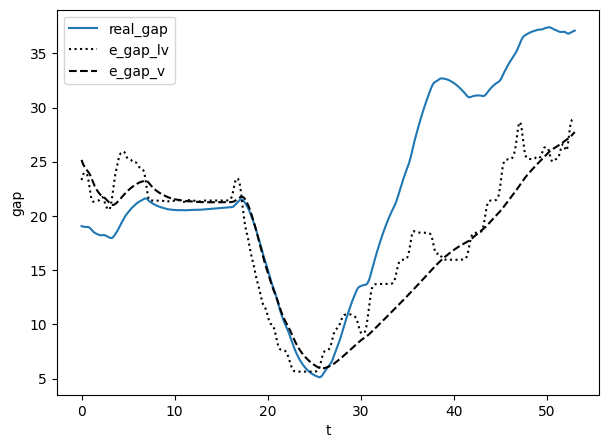

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
real_gap = full_lx - full_x - l_length
ax.plot(time, real_gap, label="real_gap")
# 此时此刻与前车达成稳态的净间距（sv稳态线前车相应速度下的净间距）（Newell理论稳态线）
ax.plot(time, e_gap_lv, linestyle=":", color="black", label="e_gap_lv")
# 此时此刻满足自身速度稳态所需的净间距（sv稳态线本车相应速度下的净间距）（流线指向sv稳态线）（Laval迟滞测算）
ax.plot(time, e_gap_own_v, linestyle="--", color="black", label="e_gap_v")
ax.set_xlabel("t")
ax.set_ylabel("gap")
ax.legend()
# 横向交点对应相同速度，可以由此看出与前车的速度延迟
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\IDM_time_gap.png")

In [28]:
df_param_merge.to_pickle(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge.pkl")
df_param_merge.to_csv(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge.csv", index=False)

In [3]:
df_param_merge = pd.read_pickle(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge.pkl")

array([[<Axes: title={'center': 's0'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 'v0'}>, <Axes: title={'center': 'T'}>,
        <Axes: title={'center': 'omega'}>, <Axes: title={'center': 'd'}>],
       [<Axes: title={'center': 'delta'}>,
        <Axes: title={'center': 'Pair_ID'}>,
        <Axes: title={'center': 'ObjV'}>,
        <Axes: title={'center': 'dec_vs'}>,
        <Axes: title={'center': 'acc_vs'}>,
        <Axes: title={'center': 'total_vs'}>],
       [<Axes: title={'center': 'dec_ts'}>,
        <Axes: title={'center': 'acc_ts'}>,
        <Axes: title={'center': 'total_ts'}>,
        <Axes: title={'center': 'dec_avg_acc'}>,
        <Axes: title={'center': 'acc_avg_acc'}>,
        <Axes: title={'center': 'dec_avg_speed'}>],
       [<Axes: title={'center': 'acc_avg_speed'}>,
        <Axes: title={'center': 'min_speed'}>,
        <Axes: title={'center': 'max_speed'}>,
        <Axes: title={'center': 'dv'}>,
        <Axes: title={'center': 'dec_step'}>,
  

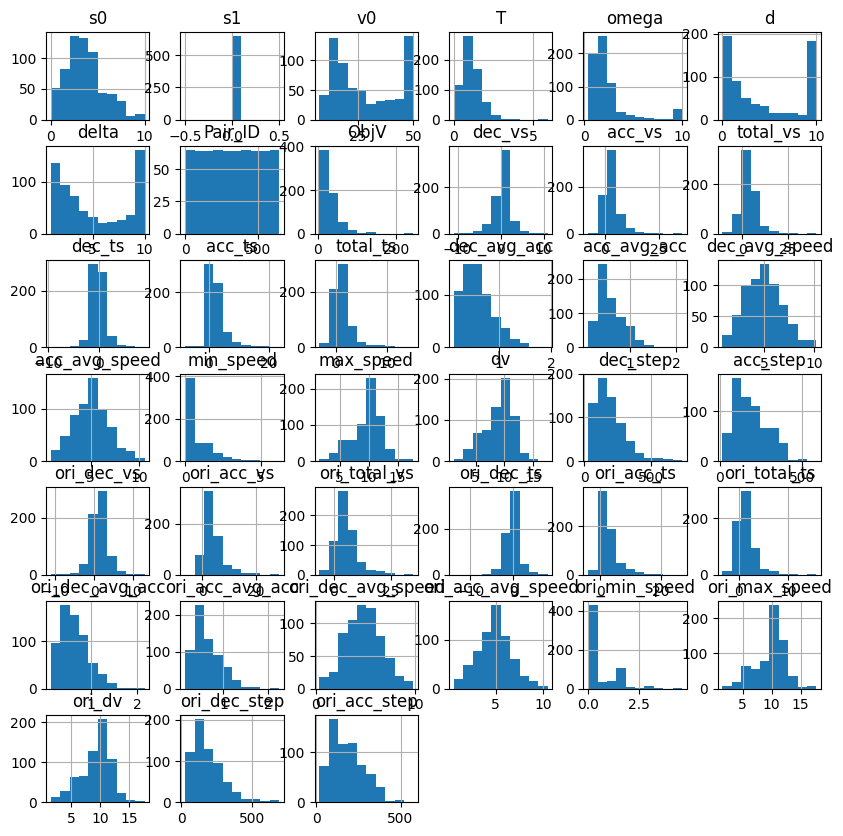

In [11]:
df_param_merge.hist(figsize=(10, 10))

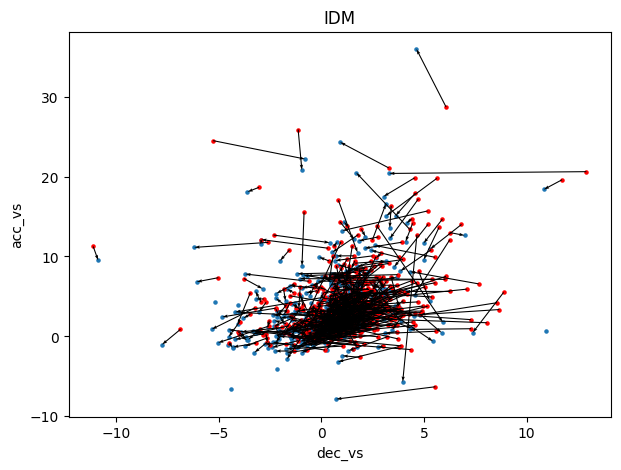

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.scatter(df_param_merge["dec_vs"], df_param_merge["acc_vs"], s=5)
ax.scatter(df_param_merge["ori_dec_vs"], df_param_merge["ori_acc_vs"], c="r", s=5)
ax.quiver(df_param_merge["ori_dec_vs"], df_param_merge["ori_acc_vs"], df_param_merge["dec_vs"] - df_param_merge["ori_dec_vs"], df_param_merge["acc_vs"] - df_param_merge["ori_acc_vs"], angles="xy", scale_units="xy", scale=1, width=0.002)
ax.set_xlabel("dec_vs")
ax.set_ylabel("acc_vs")
ax.set_title("IDM")
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\IDM_dec_acc_vs.png")

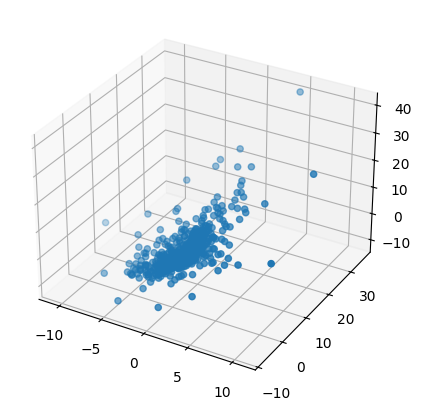

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, 1, figsize=(7, 5), subplot_kw={"projection": "3d"})
ax: Axes3D = ax
ax.scatter(df_param_merge["dec_vs"], df_param_merge["acc_vs"], df_param_merge["total_vs"])

# 不同减加速迟滞强度区间的参数变化趋势探究

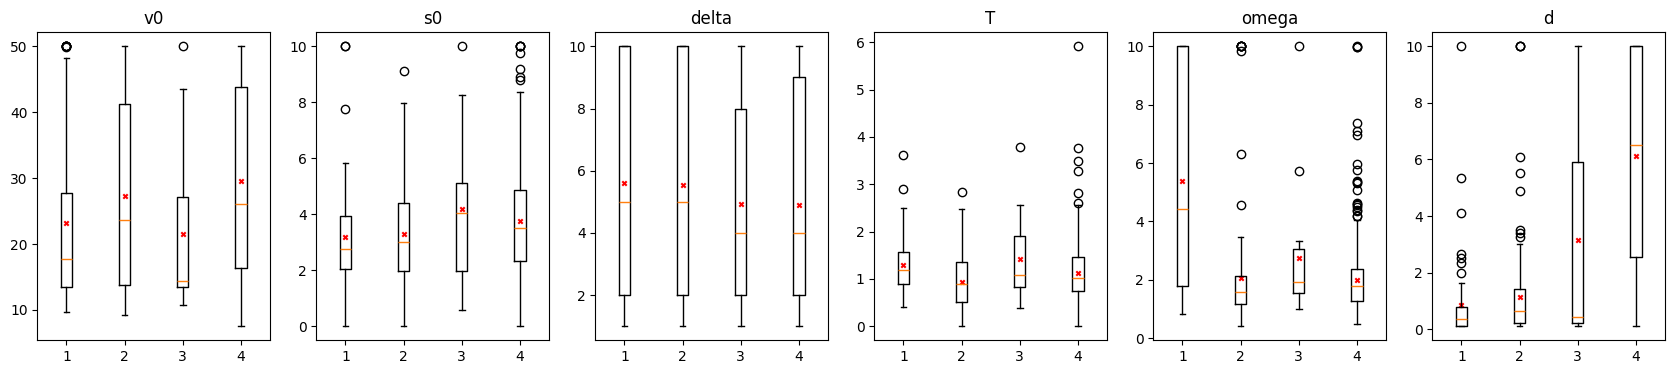

In [54]:
dec_neg_acc_neg = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0)]
dec_neg_acc_pos = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0)]
dec_pos_acc_neg = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0)]
dec_pos_acc_pos = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0)]

param_names = list(get_cf_default_param(cf_name).keys())
param_names.remove("s1")
ax_num = len(param_names)
fig, axes = plt.subplots(1, ax_num, figsize=(21, 4))

for i, name in enumerate(param_names):
    axes[i].boxplot([dec_neg_acc_neg[name], dec_neg_acc_pos[name], dec_pos_acc_neg[name], dec_pos_acc_pos[name]], showfliers=True, widths=0.2)
    axes[i].scatter([1, 2, 3, 4], [dec_neg_acc_neg[name].mean(), dec_neg_acc_pos[name].mean(), dec_pos_acc_neg[name].mean(), dec_pos_acc_pos[name].mean()], c="r", s=10, marker="x")
    axes[i].set_title(name)

fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\IDM_type_param_boxplot.png")

# 迟滞贡献指数

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [16]:
param_names = list(get_cf_default_param(cf_name).keys())
param_names.remove("s1")
data = df_param_merge[param_names]
data

,v0,s0,delta,T,omega,d
0,40.223259,2.721968,3.0,1.935539,1.207851,7.672031
1,22.209832,2.469139,3.0,1.048622,9.995506,5.327265
2,21.852206,5.319366,4.0,0.744762,10.000000,1.186306
3,16.128898,0.000010,3.0,1.979694,1.766205,3.125980
4,42.237055,2.791862,1.0,0.795507,4.016141,10.000000
...,...,...,...,...,...,...
639,23.573524,1.592674,3.0,1.393871,2.331309,1.969307
640,24.008672,0.100231,2.0,2.041454,1.973792,10.000000
641,50.000000,1.295023,8.0,0.487175,1.846598,1.873591
642,18.838055,2.806187,2.0,1.370878,2.840133,8.540486


In [36]:
target = np.zeros(len(df_param_merge), dtype=int)

target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0))[0]] = 2
target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0))[0]] = 3

print("target:", np.unique(target, return_counts=True))
target

target: (array([0, 1, 2, 3]), array([ 61, 147,  15, 421], dtype=int64))


array([3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 0, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 0, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 0, 2, 3, 3, 3, 0, 3, 1, 3, 3, 3, 0, 3, 3, 0, 1, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 1, 0, 3, 1, 0, 3, 3, 3, 1, 3, 1, 1, 3, 0, 1,
       0, 3, 3, 1, 3, 0, 3, 3, 0, 3, 1, 1, 2, 3, 3, 3, 1, 3, 1, 3, 3, 0,
       3, 1, 0, 3, 3, 0, 3, 1, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0,
       1, 2, 3, 0, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 3, 3, 3, 0, 1, 3, 1, 1, 3, 1, 1, 3,

In [37]:
def train(n, x_train, y_train, random_state=0):
    rfc: RandomForestClassifier = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rfc.fit(x_train,y_train)
    return rfc

def test(rfc, x_test, y_test):
    return rfc.score(x_test, y_test)

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)

In [43]:
result = joblib.Parallel(n_jobs=-1)(joblib.delayed(train)(n, Xtrain, Ytrain) for n in range(2, 50))

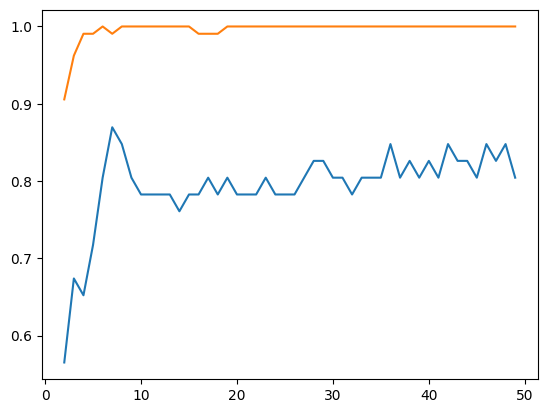

In [46]:
plt.plot(range(2, 50), [test(rfc, Xtest, Ytest) for rfc in result])
plt.plot(range(2, 50), [test(rfc, Xtrain, Ytrain) for rfc in result])

In [40]:
result = joblib.Parallel(n_jobs=-1)(joblib.delayed(train)(20, Xtrain, Ytrain, np.random.randint(0, 9999)) for _ in range(50))
score = [test(rfc, Xtest, Ytest) for rfc in result]
feature_importance = np.array([rfc.feature_importances_ for rfc in result])
print("mean score:", np.mean(score))
mean_importance = feature_importance.mean(axis=0)
[*zip(param_names, mean_importance)]

mean score: 0.7704123711340206


[('v0', 0.11797171857298779),
 ('s0', 0.12105320484571461),
 ('delta', 0.05472999522834571),
 ('T', 0.12175458257383986),
 ('omega', 0.19351835809867968),
 ('d', 0.3909721406804325)]

## Spearman Correlation Coefficient

In [42]:
param_names = list(get_cf_default_param(cf_name).keys())
param_names.remove("s1")
corr = df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs"]].corr(method="spearman")
corr

,v0,s0,delta,T,omega,d,dec_vs,acc_vs,total_vs
v0,1.000000,0.082588,0.086270,0.065871,-0.018731,0.081453,0.122427,0.103736,0.133403
s0,0.082588,1.000000,0.186240,-0.231038,0.140333,-0.026582,0.198982,0.206507,0.232598
delta,0.086270,0.186240,1.000000,0.029971,-0.011676,-0.107843,-0.083669,-0.081550,-0.084763
T,0.065871,-0.231038,0.029971,1.000000,-0.107499,0.127915,0.127243,-0.092442,-0.011063
omega,-0.018731,0.140333,-0.011676,-0.107499,1.000000,0.178799,-0.162251,-0.506148,-0.428273
d,0.081453,-0.026582,-0.107843,0.127915,0.178799,1.000000,0.657494,0.239034,0.439244
dec_vs,0.122427,0.198982,-0.083669,0.127243,-0.162251,0.657494,1.000000,0.436733,0.730156
acc_vs,0.103736,0.206507,-0.081550,-0.092442,-0.506148,0.239034,0.436733,1.000000,0.892258
total_vs,0.133403,0.232598,-0.084763,-0.011063,-0.428273,0.439244,0.730156,0.892258,1.000000


TypeError: 'Axes' object is not subscriptable

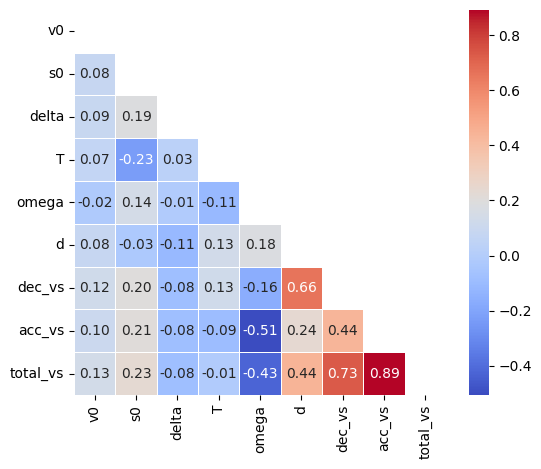

In [49]:
from scipy.stats import spearmanr
import seaborn as sns
# 创建一个mask，隐藏上三角的非对角线部分
mask = np.triu(np.ones_like(corr, dtype=bool))
df = df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs"]]
# 设置matplotlib的figure和axes  
fig, ax = plt.subplots(figsize=(6, 5))

#2 使用scipy.stats计算spearmanr相关系数
#该函数返回(相关系数，p-values)
p_values = spearmanr(df)[0]
annot = [[]]
# 绘制相关性矩阵  
axes = sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        axes[i * ].scatter(df[df.columns[i]], df[df.columns[j]], color='black')
        axes[i][j].text(df.columns[i], df.columns[j], f'{corr.iloc[i][j]:.2f}', ha='center', va='center')
        if i != j: # 避免重复绘制  
            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])
            plt.title(f'Scatter plot of {df.columns[i]} vs {df.columns[j]}')
            plt.show()

## Xgboost

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data,target,test_size=0.2,random_state=7)

# xgboost模型初始化设置
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)
watchlist = [(dtrain,'train')]

# booster:
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':5,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'gamma':0.15,
        'learning_rate' : 0.01}

# 建模与预测：50棵树
bst=xgb.train(params, dtrain, num_boost_round=50, evals=watchlist)
ypred=bst.predict(dtest)

# 设置阈值、评价指标
y_pred = (ypred >= 0.5)*1
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))

ypred = bst.predict(dtest)
print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print("特征的重要性\n",ypred_contribs )

xgb.plot_importance(bst,height=0.8,title='', ylabel='特征')
plt.rc('font', family='Arial Unicode MS', size=14)
plt.show()

XGBoostError: [15:37:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:144: label must be in [0,1] for logistic regression